### **Trabajo Práctico 1. Aplicaciones Computacionales en Negocios**
**Materia:** Aplicaciones Computacionales en Negocios  

**Universidad Torcuato Di Tella**  

**Integrantes:** Kiara Martínez, Colette Taie, Martina Mariño, Paula Ho y Josefina Casas Pardo 

**Fecha:** 22/09/25

---

### Introducción

El objetivo de este trabajo es modelar y simular el comportamiento de aviones que arriban al Aeroparque Jorge Newbery (AEP), considerando condiciones estocásticas de congestión y clima.  
Se implementa un modelo de **simulación Monte Carlo** que permite estudiar métricas de operación bajo distintos escenarios:

- Congestión en pista por alta demanda.  
- Condiciones de viento que obligan a frustrar aterrizajes.  
- Tormentas que cierran el aeropuerto de forma inesperada.  

El análisis busca cuantificar atrasos, congestión y desvíos a Montevideo, y evaluar cómo estas métricas dependen de la tasa de arribo ($\lambda$).

### **Preguntas exploratorias**

**¿Cuántos aviones aterrizan en AEP entre las 6am y la medianoche?**

Partimos de la información de que en promedio arriban **350 vuelos por día** al Aeroparque Jorge Newbery (AEP).  

Como un día completo tiene 24 horas, eso equivale a aproximadamente:

$$ \frac{350}{24} \approx 14.6 \ \text {vuelos/hora} $$

Entre las 6 am y la medianoche transcurren 18 horas, por lo que estimamos:

$$ 14.6 \times 18 \approx 263 \ \text {vuelos} $$

*Respuesta final:* Alrededor de **263 aviones** aterrizan en AEP en ese rango horario.

---

**¿Cuánto es una milla náutica en kilómetros? ¿Y un nudo en kilómetros por hora?**

Las equivalencias son:

$$ 1 \ \text{milla náutica (mn)} = 1.852 \ \text{km} $$
$$ 1 \ \text{nudo (k)} = 1.852 \ \text{km/h} $$

---

**¿Cuánto tardaría un avión en llegar desde las 100 mn hasta AEP? Y si la velocidad a más de 100 mn fuera 500 nudos, ¿cuánto tardaría en llegar desde Rosario a AEP? Estos órdenes de magnitud, ¿tienen sentido con lo que se puede consultar en Aerolíneas Argentinas?**

##### Aproximación desde 100 mn a AEP

Distancia total: 

$$ 100 \ \text{mn} = 185.2 \ \text{km} $$

Dividimos en tramos según la tabla de distancias y velocidades:

1. 100-50 mn (50 mn = 92.6 km)
   
   Velocidad promedio: $$ \frac{300+250}{2} = 275 \ \text{nudos} = 509.3 \ \text{km/h} $$

   $$ t_1 = \frac{92.6}{509.3} = 0.18 \ \text{h} \approx 10.9 \ \text{min} $$

2. 50- 15 mn (35 mn = 64.8 km)
   
   Velocidad promedio: $$ \frac{250 + 200}{2} = 225 \ \text{nudos} = 416.7 \ \text{km/h} $$

   $$ t_2 = \frac{64.8}{416.7} = 0.15 \ \text{h} \approx 9.3 \ \text{min} $$

3. 15-5 mn (10 mn = 18.5 km)

   Velocidad promedio: $$ \frac{200 + 150}{2} = 175 \ \text{nudos} = 324.1 \ \text{km/h} $$

   $$ t_3 = \frac{18.5}{324.1} = 0.057 \ \text{h} \approx 3.4 \ \text{min} $$

4. 5-0 mn (5 mn = 9.3 km)

   Velocidad promedio: $$ \frac{150 + 120}{2} = 135 \ \text{nudos} = 250.02 \ \text{km/h} $$

   $$ t_4 = \frac{9.3}{250.02} = 0.037 \ \text{h} \approx 2.2 \ \text{min} $$

Tiempo total de aproximación:

$$ T = t_1 + t_2 + t_3 + t_4 \approx 26 \ \text{minutos} $$

##### Trayecto Rosario – AEP

Distancia aproximada:

$$ 293.6 \ \text{km} $$

Velocidad:

$$ 500 \ \text{nudos} = 926 \ \text{km/h} $$

Tiempo:

$$ T = \frac{293.6}{926} \approx 0.32 \ \text{h} \approx 19 \ \text{minutos} $$


*Respuesta final:* El tiempo estimado es de **26 minutos** para la aproximación desde 100 mn y de **19 minutos** para el trayecto Rosario – AEP a 500 nudos. Estos órdenes de magnitud son consistentes con los tiempos de vuelo publicados por Aerolíneas Argentinas para recorridos cortos.  

---

**¿Cuál es la cantidad máxima de aterrizajes que podrían suceder en teoría en AEP por entre las 6am y la medianoche?**

En ese rango horario hay:

$$ 18 \ \text{horas} = 1080 \ \text{minutos} $$

Si la separación mínima es de 4 minutos:

$$ \frac{1080}{4} = 270 \ \text{aterrizajes máximos} $$

*Respuesta final:* Como máximo, podrían aterrizar **270 aviones** entre las 6am y la medianoche.

### **Parte 1 – Simulación básica de Monte Carlo y visualización**  

En esta primera parte implementamos la simulación de la fila de aviones.  
El modelo considera:

- Aviones que aparecen en el radar a 100 millas náuticas (mn).  
- Aproximación con velocidades máximas según tramo.  
- Regla de separación mínima de 4 minutos.  
- Ajustes de velocidad o desvíos a Montevideo en caso de congestión.  

Para visualizarlo, generamos una animación estilo radar futurista, con los aviones aproximándose a AEP.

In [1]:
from IPython.display import HTML
from simulacion import simular_con_historia
#from graficos import animar_fila_radar

# Simulación 
sim_data = simular_con_historia(lambda_por_min = 0.2, minutos = 200, seed = 42)

# Visualización
#anim = animar_fila_radar(sim_data["historia"], 200, 30)
#HTML(anim.to_jshtml())

### **Parte 2 – Relación entre tasa de arribo y $\lambda$**


Si el promedio es de **1 avión por hora**, y hay 60 minutos en una hora, entonces:  

$$ \lambda = \frac{1}{60} \approx 0.0167 $$

Este valor representa la probabilidad de que aparezca un avión en un minuto dado. 

### **Parte 3 – Probabilidad de 5 aviones en una hora**

Con $\lambda$ = 1/60, el número de arribos en una hora sigue una **distribución de Poisson** con media 1.  

Analizamos la probabilidad de que arriben exactamente 5 aviones en una hora por dos métodos: 
  
- **Simulación Monte Carlo:** función `estimar_prob_5`, que corre múltiples simulaciones de 60 minutos.  
- **Cálculo teórico:** distribución de Poisson con parámetro $\mu = 1$.

In [2]:
import numpy as np
from simulacion import run_simulacion

def estimar_prob_5(n_sim = 200_000, seed = 42):
    np.random.seed(seed)
    cuenta_5 = 0
    
    for i in range(n_sim):
        aviones = run_simulacion(lambda_por_min = 1/60, minutos = 60, seed = seed + i)
        if len(aviones) == 5:
            cuenta_5 += 1
    
    # Estimación Monte Carlo de P(N=5)
    p_hat = cuenta_5 / n_sim
    se = np.sqrt(p_hat * (1 - p_hat) / n_sim) # error estándar
    ic = (p_hat - 1.96 * se, p_hat + 1.96 * se) # IC 95%
    return p_hat, se, ic

p_hat, se, ic = estimar_prob_5(n_sim = 200_000, seed = 42)

print(f"Probabilidad estimada (Monte Carlo): {p_hat:.5f}")
print(f"Error estándar: {se:.5f}")
print(f"IC 95%: ({ic[0]:.5f}, {ic[1]:.5f})")

Probabilidad estimada (Monte Carlo): 0.00286
Error estándar: 0.00012
IC 95%: (0.00263, 0.00309)


Con la simulación de Monte Carlo el resultado fue:

- Probabilidad estimada: **0.00286**
- Error estándar: **0.00012**
- IC 95%: (0.00263, 0.00309)

De manera analítica, la probabilidad de que lleguen exactamente 5 aviones es:

$$ P(N=5) = \frac{e^{-1}\cdot 1^5}{5!} \approx 0.00307 $$

*Respuesta final:* la probabilidad de que lleguen 5 aviones en una hora es $\; \approx 0.3\%$, valor que coincide con la estimación obtenida por Monte Carlo.

---

¿Por qué usamos Poisson y no Binomial?

En rigor, si dividimos la hora en 60 intervalos de un minuto, con probabilidad $p=\lambda=1/60$ de arribo en cada minuto, el número de aviones en una hora sigue una distribución Binomial(60, 1/60).

Sin embargo, para procesos de llegadas raras e independientes, cuando el número de intervalos $n$ es grande y $p$ es pequeño de modo que $ np=\lambda t $ se mantiene constante, la Binomial se aproxima muy bien a una Poisson( $\mu=\lambda t $).
En este caso, $n=60$ y $ p=1/60 $ hacen que $\mu = 1$, por lo que la distribución de arribos puede modelarse directamente con una Poisson(1). Esto simplifica el cálculo y refleja de forma más natural la naturaleza del proceso de arribos (un proceso de Poisson en tiempo continuo).

### **Parte 4 – Congestión según $\lambda$**

Analizamos el impacto de distintos valores de $\lambda$:  

$$ \{0.02, 0.1, 0.2, 0.5, 1.0\} $$

Para cada escenario medimos:  
- **Frecuencia de congestión** (aviones volando más lento que lo permitido).  
- **Atraso promedio** respecto al tiempo ideal.  
- **Desvíos a Montevideo**.  

Usamos `correr_experimentos` para obtener resultados con error de estimación.

In [3]:
from analisis import MetricasSimulacion, print_resumen
from experimentos import correr_experimentos

lambdas = [0.02, 0.1, 0.2, 0.5, 1]
metricas_lambdas = {lam: MetricasSimulacion() for lam in lambdas}

df = correr_experimentos(lambdas, n_rep = 150, metricas_lambda = metricas_lambdas, seed = 2025)
print_resumen(metricas_lambdas)



Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3227         3302       75              485                0               0               0              
0.1        15420        16335      503             15480              412             0               0              
0.2        19180        32638      1048            54032              12410           0               0              
0.5        19106        81079      1344            80389              60629           0               0              
1          17700        162000     1350            36000              142950          0               0              


**Observaciones:**

- **Aterrizajes:** Para valores bajos de $\lambda$, la mayoría de los aviones logran aterrizar. A medida que $\lambda$ aumenta, la proporción de aterrizajes respecto al total de aviones disminuye, evidenciando saturación del sistema.

- **Aviones en vuelo:** El número de aviones que quedan en vuelo al final de la simulación crece con $\lambda$, reflejando congestión y acumulación en el espacio aéreo.

- **Reinserciones:** Las reinserciones aumentan fuertemente con $\lambda$, lo que indica que muchos aviones deben esperar o realizar maniobras para mantener la separación mínima.

- **Desvíos a Montevideo:** Para $\lambda$ bajos, los desvíos son nulos, pero a partir de $\lambda = 0.2$ se incrementan rápidamente, llegando a valores extremos en $\lambda = 1.0$. Esto muestra que el aeropuerto no puede absorber tanta demanda y muchos vuelos deben ser redirigidos.


##### **Análisis de aviones de aterrizaron**

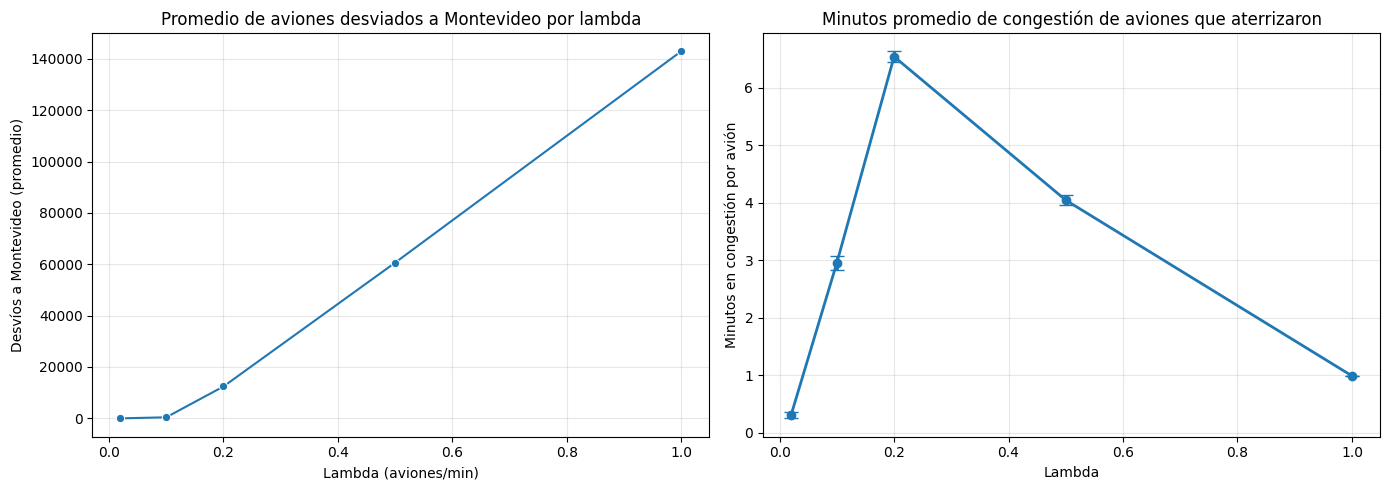

Lambda     Promedio   Std        N          Error MC        IC95_lower      IC95_upper     
-------------------------------------------------------------------------------------
0.02       0.31       0.36       150        0.0291          0.2525          0.3665         
0.10       2.96       0.76       150        0.0618          2.8390          3.0812         
0.20       6.55       0.59       150        0.0483          6.4506          6.6398         
0.50       4.05       0.56       150        0.0456          3.9587          4.1375         
1.00       0.99       0.00       150        0.0000          0.9915          0.9915         


In [4]:
from graficos import plot_desvios_y_congestion
from analisis import IC_globales

plot_desvios_y_congestion(metricas_lambdas,df)
res = IC_globales(df)

- La congestión promedio crece rápidamente a medida que aumenta $\lambda$ desde valores bajos, alcanzando un máximo en $\lambda = 0.20$.
- Para valores altos de $\lambda$ (0.5 y 1.0), la congestión promedio disminuye. Esto se debe a que, en escenarios de alta congestión, muchos aviones son desviados y no se incluyen en el cálculo de congestión de los aterrizados.

*Este comportamiento resalta la importancia de considerar los desvíos en el análisis, ya que la congestión promedio puede dar una impresión engañosa si solo se calcula sobre los aviones que logran aterrizar.*

**Detalle de congestión por cada tramo de velocidad**

Lambda     Freq. Cong. IC Low     IC Up      Max Cong.  IC Low     IC Up      Lejos      Medio      Cerca     
----------------------------------------------------------------------------------------------------
0.02       0.006      0.005      0.007      0.7        0.6        0.8        0.3        0.0        0.0       
0.10       0.239      0.229      0.250      2.6        2.6        2.7        2.8        0.2        0.0       
0.20       0.803      0.796      0.810      3.9        3.9        4.0        6.4        0.1        0.0       
0.50       0.989      0.988      0.990      4.1        4.1        4.2        4.0        0.0        0.0       
1.00       0.999      0.999      0.999      3.0        3.0        3.0        1.0        0.0        0.0       
----------------------------------------------------------------------------------------------------
Lejos, Medio y Cerca son minutos promedio de congestión por tramo (>50MN, 15-50MN, <15MN).


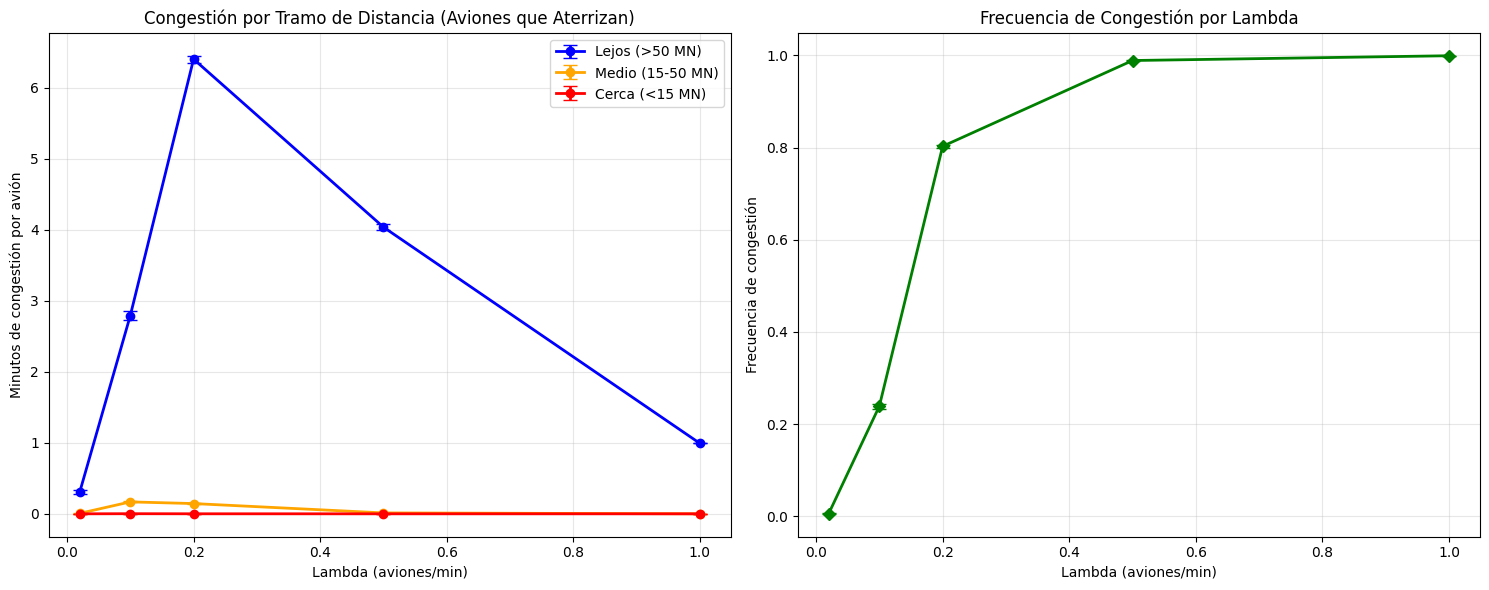

In [5]:
from analisis import print_resumen_congestion
from graficos import plot_congestion_por_lambda

print_resumen_congestion(df)
plot_congestion_por_lambda(df)

- La **frecuencia de congestión** aumenta fuertemente con $\lambda$, pasando de casi nula en $\lambda = 0.02$ a prácticamente segura en $\lambda = 1.0$. Es decir, a mayor lambda más seguridad de que hay aviones atravezando congestión en cada minuto.
- La congestión se concentra principalmente en los tramos **lejanos** a AEP ("Lejos"), mientras que en los tramos **medios** y **cercanos** la congestión es prácticamente inexistente.
- Esto refleja que los aviones sufren demoras y reducción de velocidad principalmente al inicio de la aproximación, cuando la acumulación de tráfico es mayor. En los tramos finales, la separación y el ordenamiento permiten mantener velocidades óptimas.

##### **Análisis de aviones desviados a Montevideo**

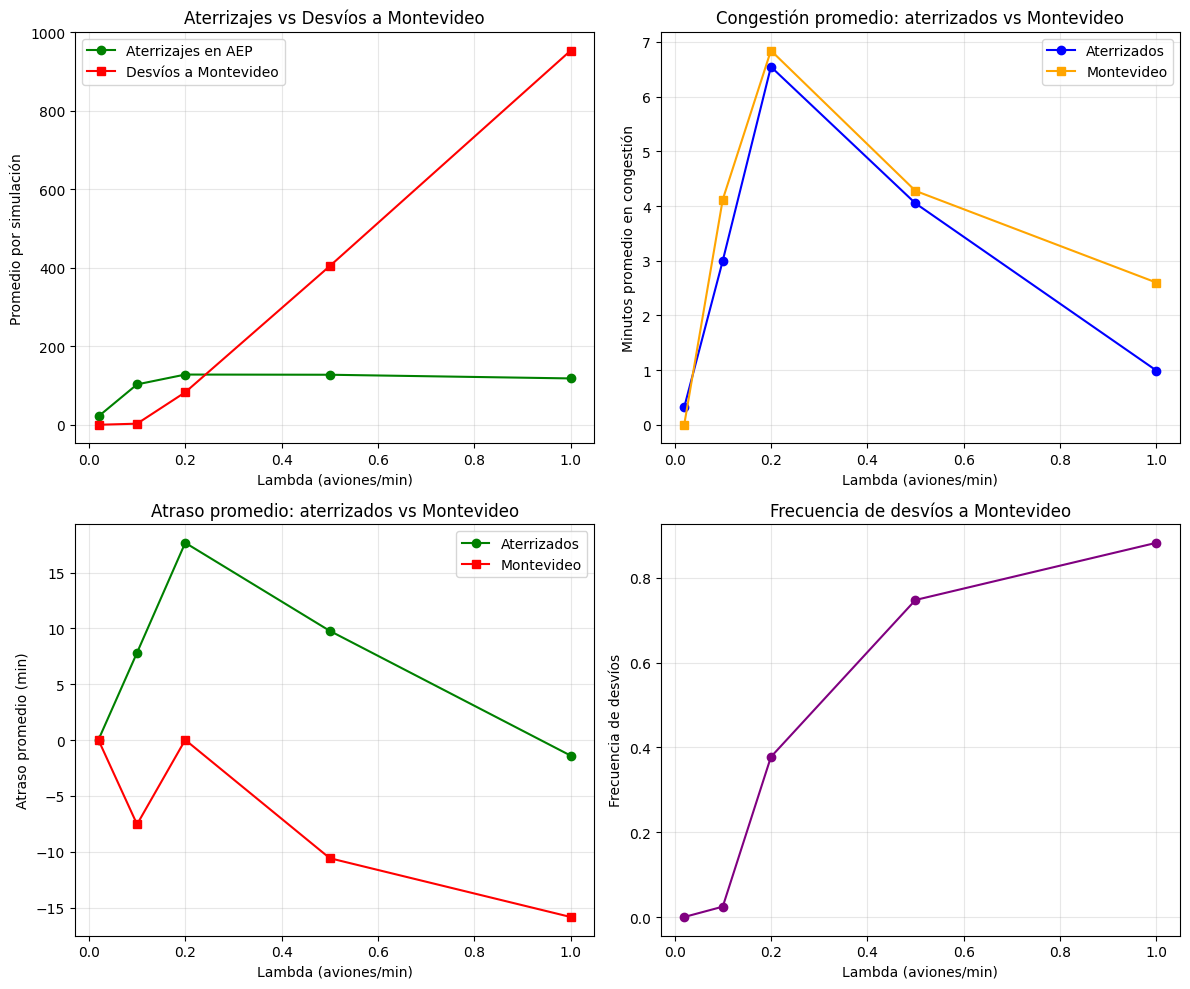

In [6]:
from graficos import plot_congestion_montevideo
plot_congestion_montevideo(df)

**¿Qué ocurre con el atraso total?**

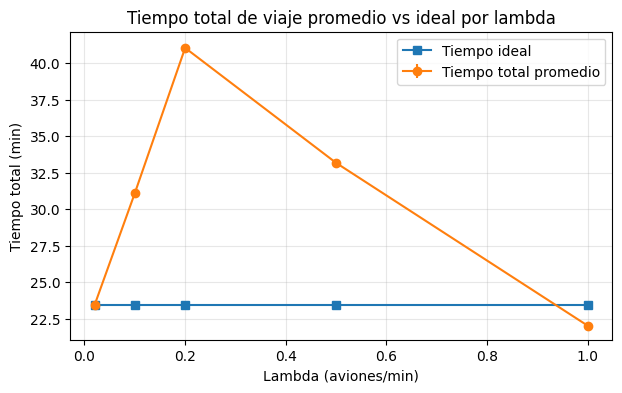

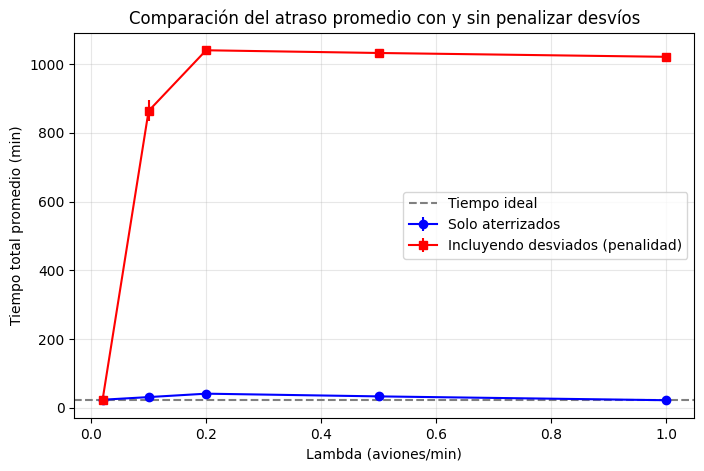

In [7]:
from graficos import plot_atraso_vs_desvios
from graficos import plot_comparacion_tiempos

plot_comparacion_tiempos(df)
plot_atraso_vs_desvios(df)

**Análisis adicional: impacto de considerar los desvíos**

En la sección anterior observamos que el **tiempo de viaje promedio** tenía un pico en 
$\lambda = 0.2$ y luego descendía para valores mayores de $\lambda$.  
Esto parecía contraintuitivo, ya que al aumentar la demanda esperaríamos más atrasos.

Para entenderlo mejor, comparamos dos métricas:

- **Solo aterrizados:** se calcula el atraso promedio únicamente sobre los aviones 
  que efectivamente lograron aterrizar en AEP.  
- **Incluyendo desviados (penalidad):** se asigna un valor de atraso muy grande 
  (prácticamente infinito) a los aviones que debieron desviarse a Montevideo.

**Resultados:**
- En la curva azul (solo aterrizados), se observa el mismo comportamiento que antes: 
  un pico en $\lambda = 0.2$ y luego valores más bajos. Esto se debe a que, en escenarios con mucha congestión, una gran cantidad de aviones son desviados y, por lo tanto, **no se incluyen en el cálculo del tiempo de viaje promedio**.
- En la curva roja (incluyendo desviados), el atraso promedio crece de manera 
  **monótona y explosiva** a medida que $\lambda$ aumenta.  
  Esto refleja mejor la realidad operativa: cuando la demanda es demasiado alta, 
  el sistema se satura y los tiempos efectivos se vuelven inviables.

La métrica de atraso depende fuertemente de si consideramos o no a los aviones desviados.  
En contextos reales de planificación, es más adecuado incorporar la penalización por 
desvío, ya que de otro modo el indicador puede dar la falsa impresión de que el sistema 
"mejora" a altos niveles de congestión.


### **Parte 5 – Día ventoso (go-arounds 10%)**

Suponemos que cada avión tiene **1/10 de probabilidad** de frustrar su aterrizaje 
(go-around) debido al viento, debiendo desviarse y buscar un nuevo hueco en la secuencia.  

Esto incrementa de manera natural la probabilidad de atraso y de congestión.

---

**Metodología**
- Valores de $\lambda$: $\{0.02, 0.1, 0.2, 0.5, 1.0\}$.  
- Duración: **18 horas (1080 minutos)** por corrida.  
- Repeticiones: **1000 simulaciones por $\lambda$**.  
- Estadísticas reportadas con **intervalos de confianza al 95%**.
- Consideramos un **intento de "aterrizaje" a cada ventana de distancia de 5 millas nauticas a AEP**. Es decir, en el rango [0,5] solo nos preguntamos UNA sola vez si hay interrupción, o no.

Métricas analizadas:
- **Atraso promedio** respecto al tiempo ideal de aproximación.  
- **Desvíos a Montevideo**.  
- **Congestión:** frecuencia y minutos en congestión por avión.  
- **Frecuencia de go-arounds**.

In [8]:
metricas_lambdas_ventoso = {lam: MetricasSimulacion() for lam in lambdas}
df_ventoso = correr_experimentos(lambdas, n_rep = 150, dia_ventoso = True, metricas_lambda = metricas_lambdas_ventoso, seed = 2025)

print_resumen(metricas_lambdas_ventoso)

Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3216         3305       89              520                0               587             0              
0.1        13692        16279      798             26165              1789            5135            0              
0.2        16923        32546      1139            57296              14484           2265            0              
0.5        17746        81129      1376            80707              62007           1388            0              
1          16642        162000     1371            36000              143987          1058            0              


- **En vuelo:** El número de aviones que quedan en vuelo al final de la simulación aumenta con λ, reflejando congestión y acumulación en el espacio aéreo.
- **Reinserciones:** Crecen fuertemente con λ, indicando que muchos aviones deben esperar o realizar maniobras para mantener la separación mínima.
- **Desvíos por viento (Desv. Viento):** Se mantienen relativamente estables en todos los escenarios, lo que indica que el efecto del viento es constante y no depende de la congestión.


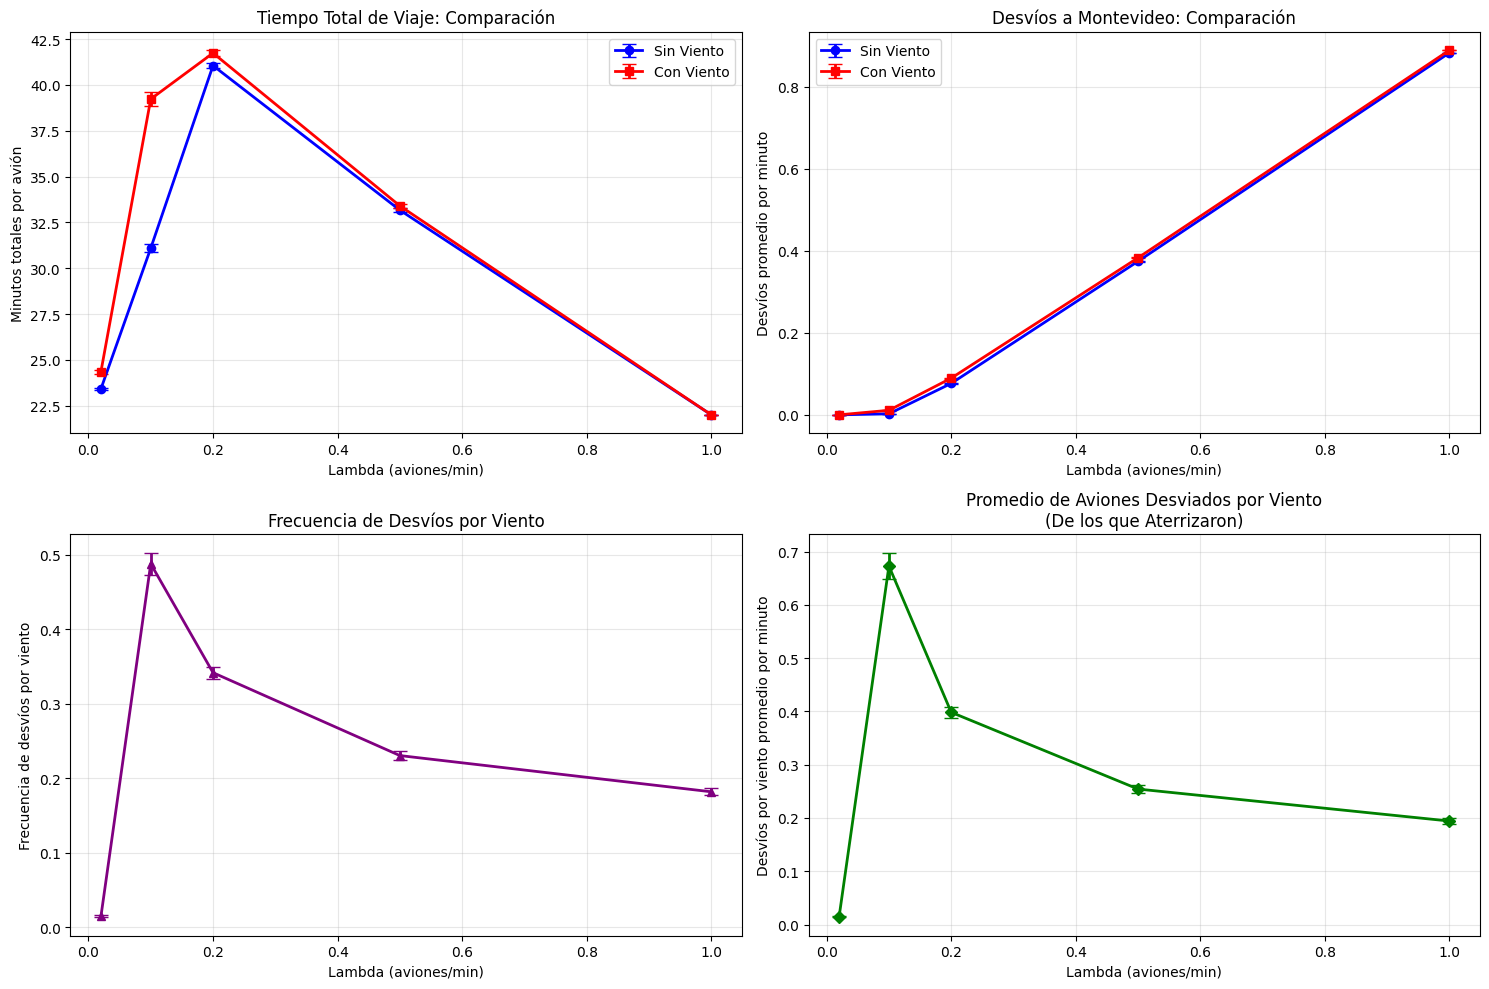

In [9]:
from graficos import plot_analisis_completo
plot_analisis_completo(df, df_ventoso)


La **frecuencia de go-arounds** es mayor al 10% esperado para $\lambda$ bajos, 
  pero se amplifica en escenarios congestionados donde los intentos fallidos 
  repercuten sobre la fila completa.

In [10]:
from simulacion import simular_con_historia
from graficos import animar_con_desvios
from IPython.display import HTML

# Simulación ejemplo: día ventoso con λ=0.2
sim_data_viento = simular_con_historia(lambda_por_min=0.2, minutos=200, seed=123, dia_ventoso=True)

# Animación con desvíos CAMBIAR
#anim_desvios = animar_con_desvios(sim_data_viento["historia"], minutos=200, tail=25)
#HTML(anim_desvios.to_jshtml())

### **Parte 6 – Tormenta con cierre de AEP**

Simulamos un evento extremo: cierre inesperado del aeropuerto durante **30 minutos**.  
Durante ese período ningún avión puede aterrizar, acumulándose una cola de espera que 
genera atrasos y desvíos a Montevideo.

======== La tormenta iniciará en el tiempo ======= 39.630072900993476
Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3214         3304       90              530                0               560             150            
0.1        13666        16259      845             26495              1748            4945            520            
0.2        16580        32573      1123            57484              14870           2003            563            
0.5        17207        81112      1404            80262              62501           1355            548            
1          16189        162000     1374            36000              144437          1061            450            


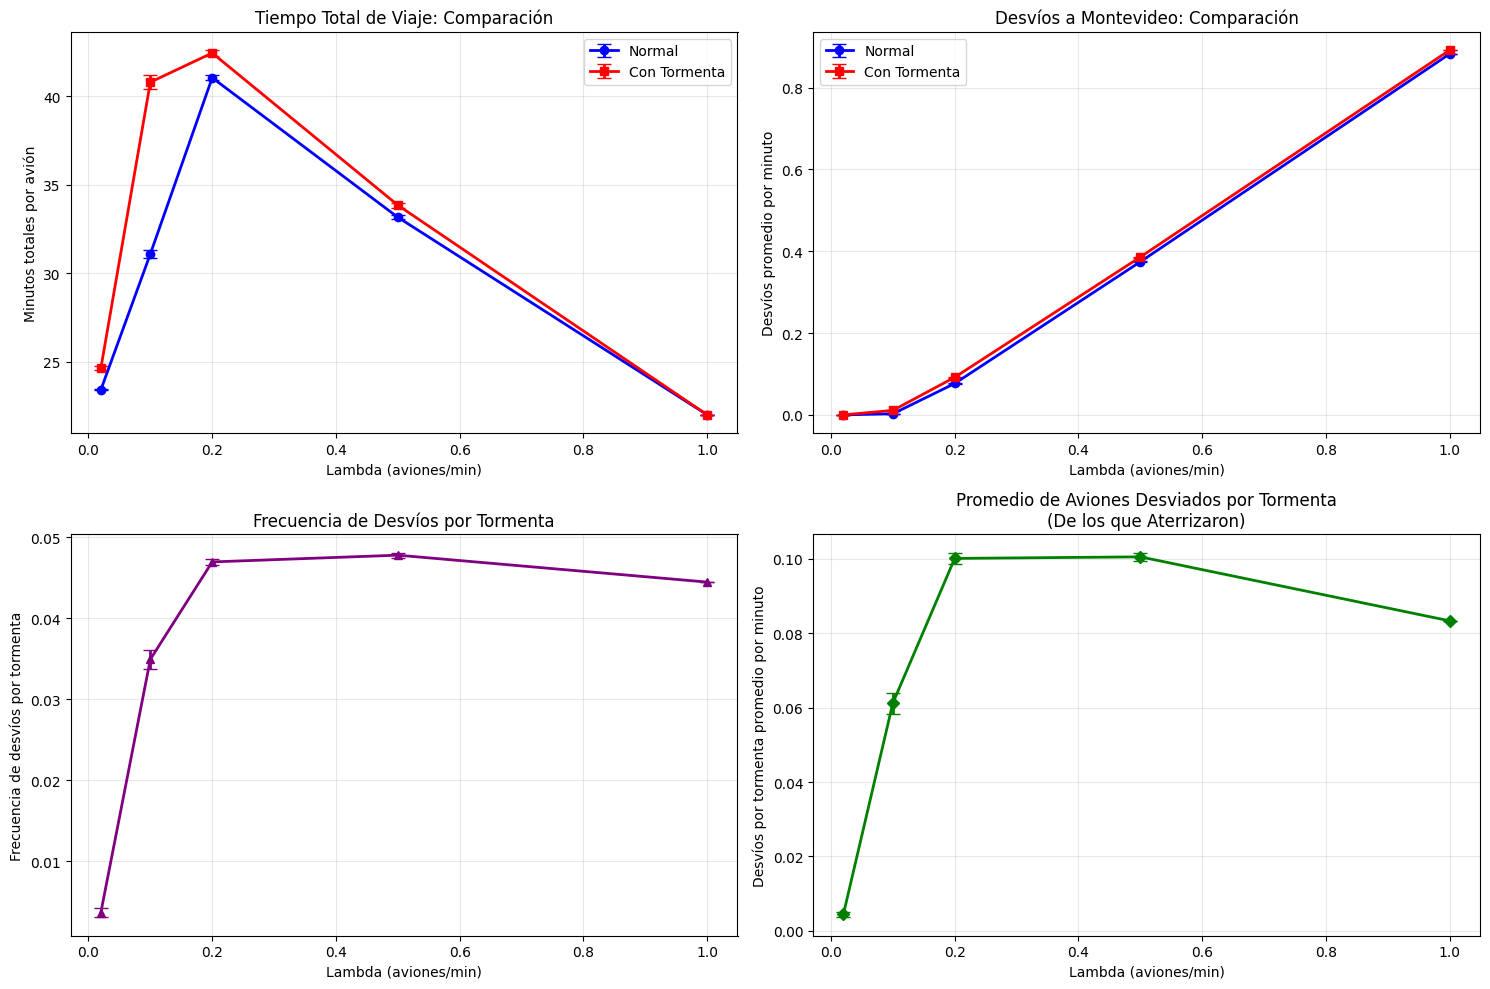

In [11]:
from graficos import plot_analisis_completo_tormenta
metricas_lambdas_tormenta = {lam: MetricasSimulacion() for lam in lambdas}

df_tormenta = correr_experimentos(lambdas, n_rep = 150, metricas_lambda = metricas_lambdas_tormenta, hay_tormenta = True, dia_ventoso= True, seed = 2027)
print_resumen(metricas_lambdas_tormenta)

plot_analisis_completo_tormenta(df, df_tormenta)

Cuando la demanda (λ) es alta, el sistema ya está saturado y la mayoría de los desvíos ocurren por congestión y viento antes de que los aviones lleguen a la etapa donde la tormenta los podría afectar.
En otras palabras, muchos aviones ya fueron desviados por otros motivos y no llegan a enfrentar la tormenta, por lo que el impacto relativo de la tormenta disminuye a medida que λ aumenta.

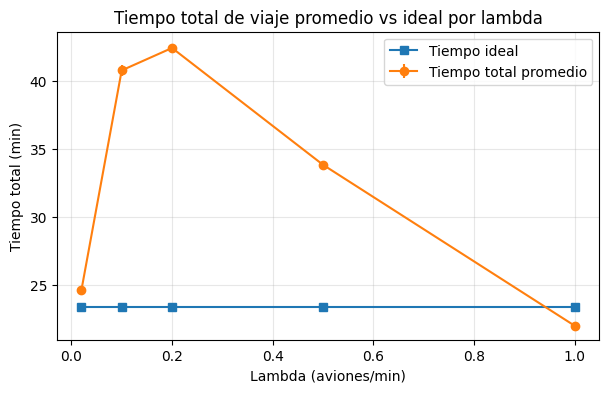

In [12]:
plot_comparacion_tiempos(df_tormenta)

En cuanto al **tiempo total de viaje**, la simulación muestra que la tormenta de 30 minutos no genera un cambio abrupto en la métrica global. Esto ocurre porque, en escenarios de alta demanda (λ alto), la mayoría de los aviones ya son desviados por congestión o viento antes de que puedan verse afectados por la tormenta. Por lo tanto, el impacto de la tormenta sobre el tiempo total de viaje promedio se diluye y no se observa una diferencia significativa respecto al escenario sin tormenta.

#### **Parte 7: Posibles mejoras**

======== La tormenta iniciará en el tiempo ======= 279.80206669756615
Lambda     Aterrizajes  Aviones    En vuelo        Reinserciones      Desv. MVD       Desv. Viento    Desv. Tormenta 
---------------------------------------------------------------------------------------------------------
0.02       3212         3304       92              533                0               580             192            
0.1        13538        16267      863             26234              1866            4858            586            
0.2        16706        32656      1149            54015              14801           2062            577            
0.5        17714        81138      1376            57772              62048           1471            588            
1          18242        162000     1511            22374              142247          1389            609            


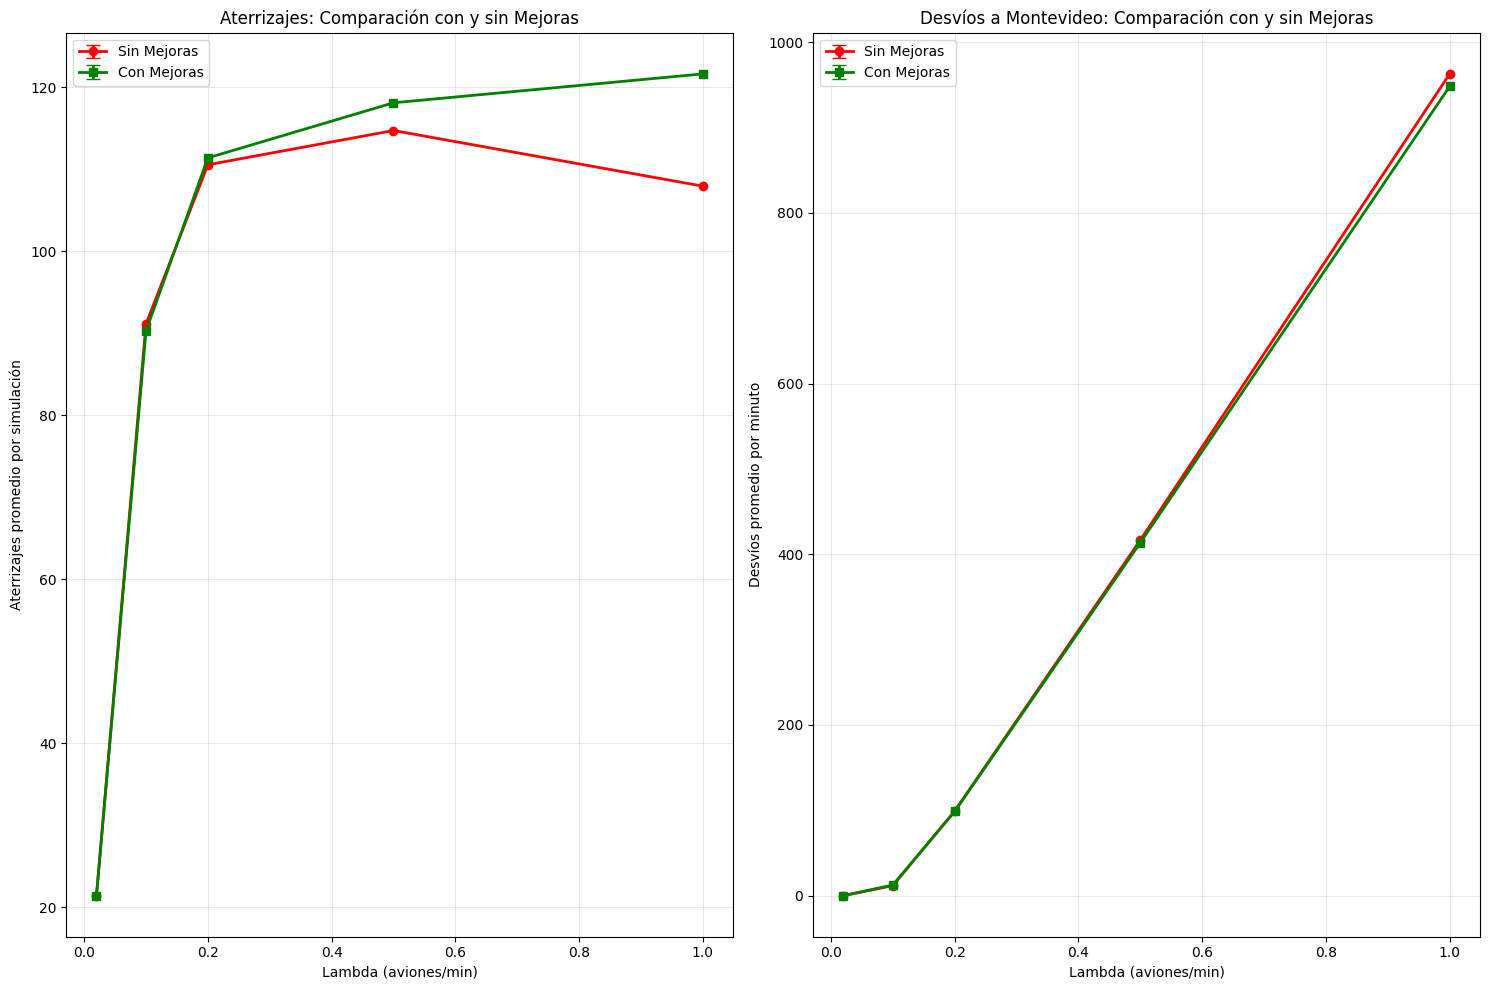

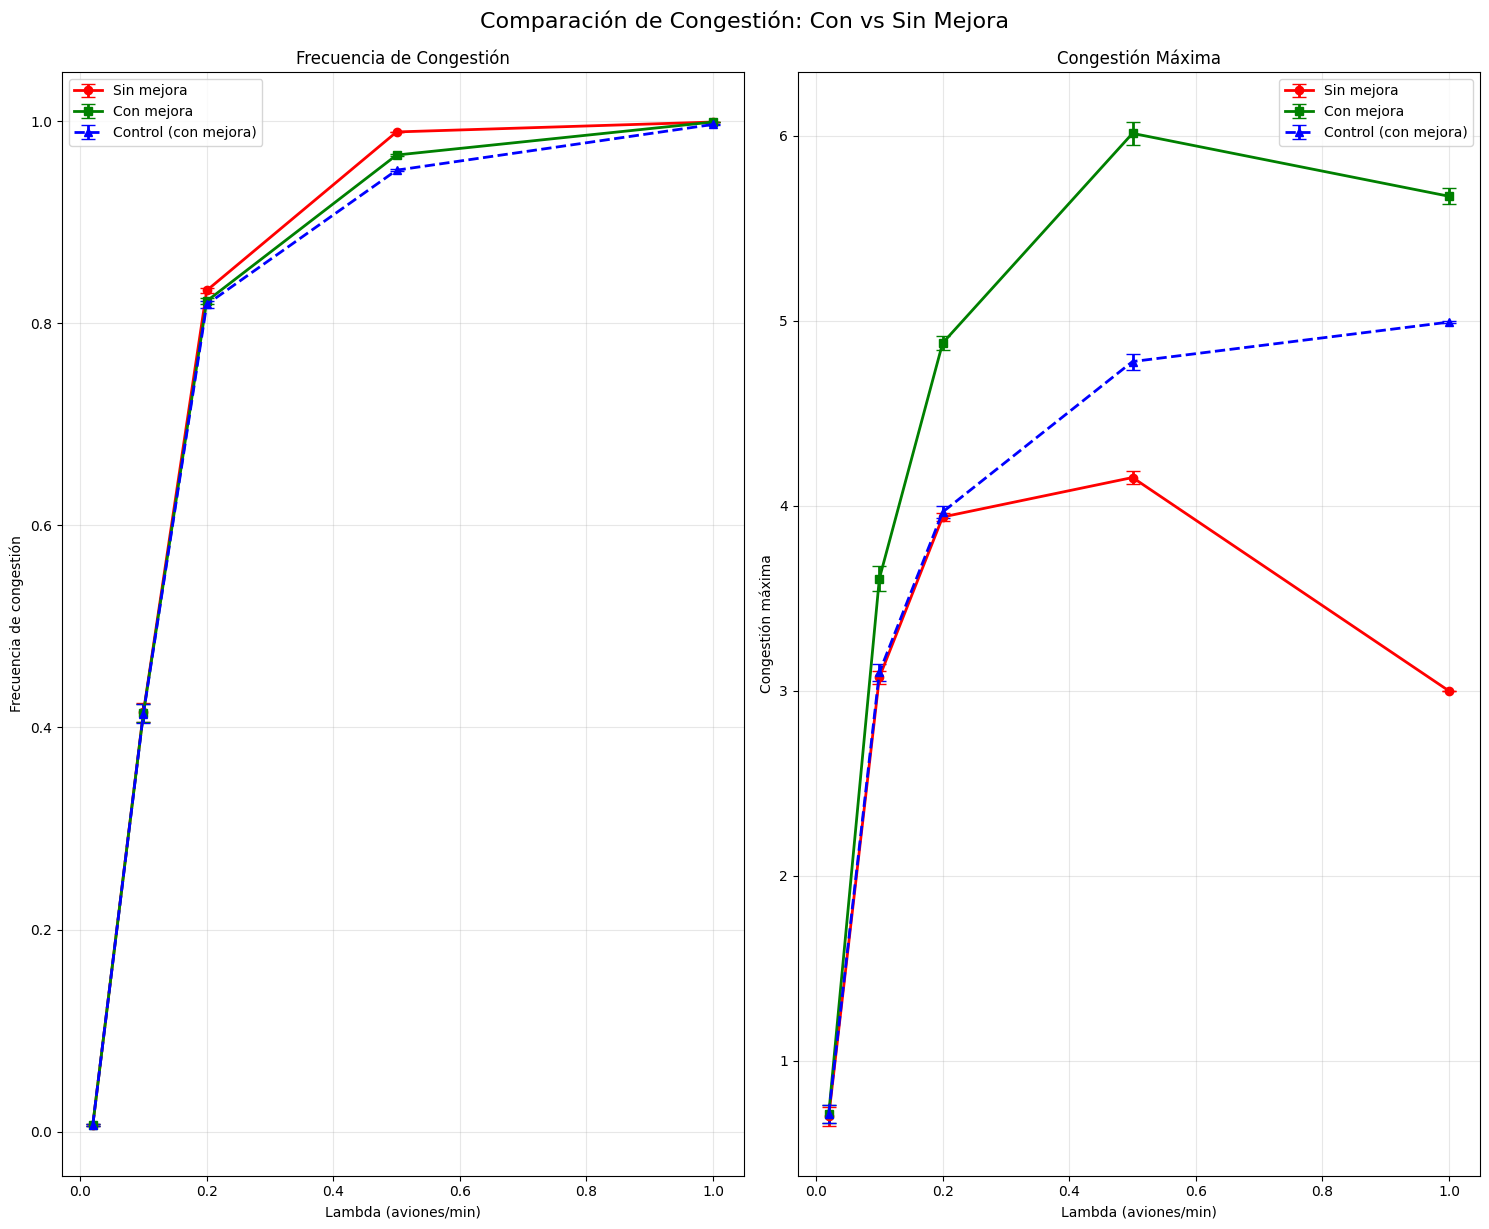


=== RESUMEN ESTADÍSTICO ===
Lambda   Tipo            Freq. Cong.  Cong. Max.  
--------------------------------------------------
0.02     Sin mejora      0.007        0.700       
0.02     Con mejora      0.007        0.713       
0.02     Control         0.007        0.713       

0.10     Sin mejora      0.415        3.073       
0.10     Con mejora      0.414        3.607       
0.10     Control         0.414        3.100       

0.20     Sin mejora      0.832        3.940       
0.20     Con mejora      0.822        4.880       
0.20     Control         0.819        3.967       

0.50     Sin mejora      0.989        4.153       
0.50     Con mejora      0.966        6.013       
0.50     Control         0.951        4.780       

1.00     Sin mejora      0.999        3.000       
1.00     Con mejora      0.999        5.673       
1.00     Control         0.997        4.993       



In [13]:
from graficos import plot_comparacion_mejoras, comparar_congestion

metricas_lambdas_mejoradas = {lam: MetricasSimulacion() for lam in lambdas}

df_mejorado= correr_experimentos(lambdas, n_rep = 150, metricas_lambda = metricas_lambdas_mejoradas, hay_tormenta = True, dia_ventoso= True, seed = 2027, mejora = True)
print_resumen(metricas_lambdas_mejoradas)

plot_comparacion_mejoras(df_tormenta, df_mejorado)
comparar_congestion(df_tormenta, df_mejorado)


#### **PARTE EXTRA: BONUS**